<a href="https://colab.research.google.com/github/SheldonFrank/copilot-codespaces-vscode/blob/main/notebooks/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

In [62]:
housing.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104T000000,4,3.25,3760,4675,2.0,0,0,3,...,2740,1020,2007,0,98038,47.3862,-122.048,3280,4033,429900.0
1,3279000420,20150115T000000,3,1.75,1460,7800,1.0,0,0,2,...,1040,420,1979,0,98023,47.3035,-122.382,1310,7865,233000.0
2,194000575,20141014T000000,4,1.00,1340,5800,1.5,0,2,3,...,1340,0,1914,0,98116,47.5658,-122.389,1900,5800,455000.0
3,2115510160,20141208T000000,3,1.75,1440,8050,1.0,0,0,3,...,1440,0,1985,0,98023,47.3187,-122.390,1790,7488,258950.0
4,7522500005,20140815T000000,2,1.50,1780,4750,1.0,0,0,4,...,1080,700,1947,0,98117,47.6859,-122.395,1690,5962,555000.0
5,3787000140,20140901T000000,3,2.25,1780,9969,1.0,0,0,3,...,1450,330,1985,0,98034,47.7286,-122.168,1950,7974,450000.0
6,7852110690,20140522T000000,4,2.50,2980,8107,2.0,0,0,3,...,2980,0,2000,0,98065,47.5389,-121.876,2750,7760,622500.0
7,5469700260,20140903T000000,4,2.25,2530,24700,2.0,0,0,3,...,2530,0,1974,0,98031,47.3939,-122.177,2650,24700,340000.0
8,8691410730,20150220T000000,4,2.50,3090,5600,2.0,0,0,3,...,3090,0,2005,0,98075,47.5970,-121.979,3080,5788,708000.0
9,114100763,20140728T000000,3,0.75,1040,15000,1.0,0,0,3,...,1040,0,1941,0,98028,47.7639,-122.234,1410,19000,230000.0


<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-2177373654.py:8: SyntaxWarning: invalid escape sequence '\.'
  mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)


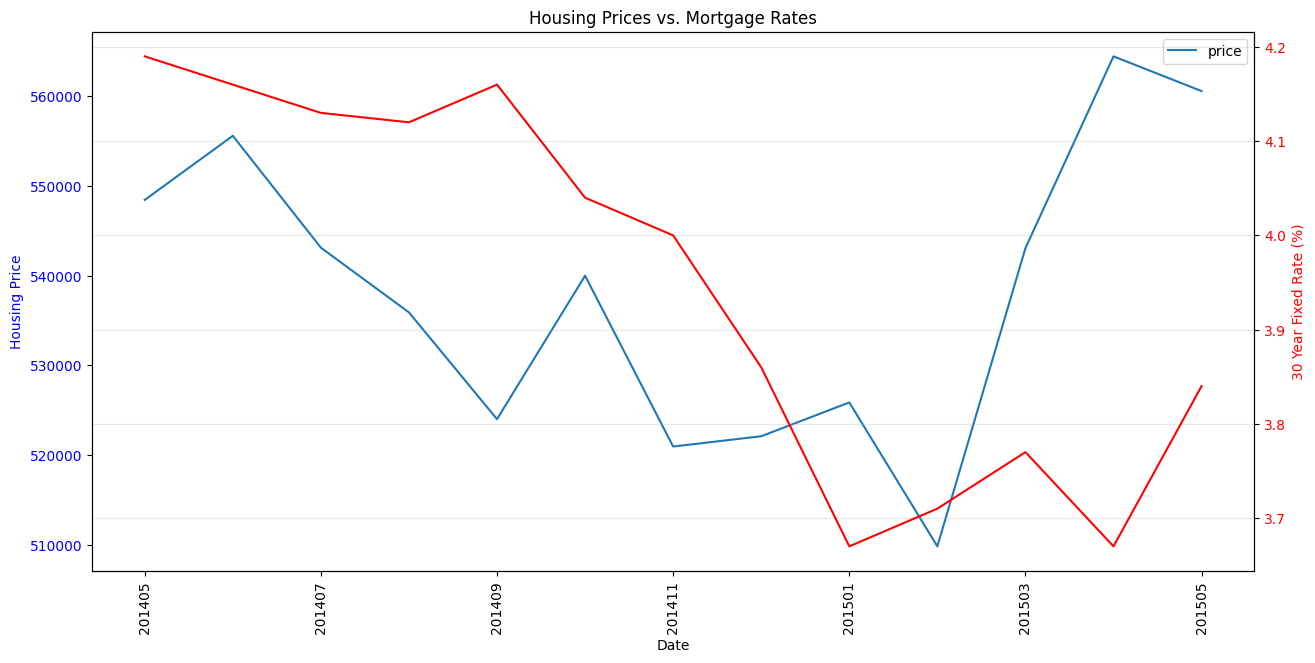

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

mortgage_rates = pd.read_csv("mortgage_rates.csv")
housing['month'] = housing['date'].map(lambda x: x[0:6])

# Convert 'Date' column in mortgage_rates to string 'YYYYMM' format
mortgage_rates['Date'] = mortgage_rates['Date'].astype(str).str.replace('\.0$', '', regex=True)

filtered_rates = mortgage_rates[mortgage_rates['Date'].isin(housing['month'])]

mean_price_by_date = housing.groupby('month')['price'].mean().reset_index()
mean_price_by_date.head()

fig, ax1 = plt.subplots(figsize=(15, 7))
mean_price_by_date.plot(x='month', y='price', rot=90, ax=ax1)
ax1.set_xlabel('Date')
ax1.set_ylabel('Housing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 3. Create a twin axis that shares the same x-axis
ax2 = ax1.twinx()
# Plot Mortgage Rates on the right y-axis (ax2)
ax2.plot(filtered_rates['Date'], filtered_rates['30 Year FRM'], color='red', label='30 Year FRM')
ax2.set_ylabel('30 Year Fixed Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 4. Final touches
plt.title('Housing Prices vs. Mortgage Rates')
plt.grid(True, alpha=0.3)
plt.show()

In [100]:
housing_merged = pd.merge(
    housing,
    filtered_rates[['Date', '30 Year FRM', '15 Year FRM']], # Select only needed columns
    left_on='month',
    right_on='Date',
    how='left' # Keep all housing rows, fill with NaN if no rate found
)


housing_final["Date"] = housing_final["Date"].map(lambda x: int(x))

housing_final.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,Date,30 Year FRM,15 Year FRM
0,1565930130,4,3.25,3.76,4.675,2.0,0,0,3,8,...,0,98038,47.3862,-122.048,3.28,4.033,429900.0,201411,4.00,3.19
1,3279000420,3,1.75,1.46,7.800,1.0,0,0,2,7,...,0,98023,47.3035,-122.382,1.31,7.865,233000.0,201501,3.67,2.99
2,194000575,4,1.00,1.34,5.800,1.5,0,2,3,7,...,0,98116,47.5658,-122.389,1.90,5.800,455000.0,201410,4.04,3.21
3,2115510160,3,1.75,1.44,8.050,1.0,0,0,3,8,...,0,98023,47.3187,-122.390,1.79,7.488,258950.0,201412,3.86,3.13
4,7522500005,2,1.50,1.78,4.750,1.0,0,0,4,7,...,0,98117,47.6859,-122.395,1.69,5.962,555000.0,201408,4.12,3.25


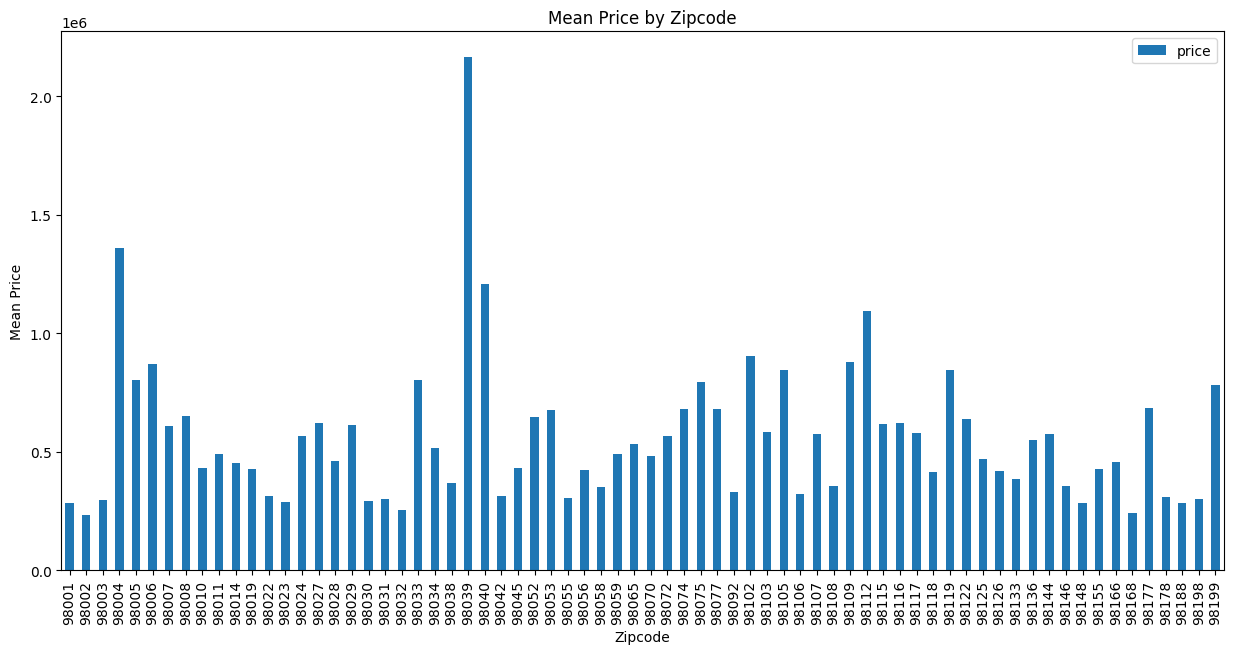

In [92]:
mean_price_by_zipcode = housing.groupby('zipcode')['price'].mean().reset_index()
ax = mean_price_by_zipcode.plot.bar(x='zipcode', y='price', rot=90, figsize=(15, 7))
plt.title('Mean Price by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Mean Price')
plt.show()

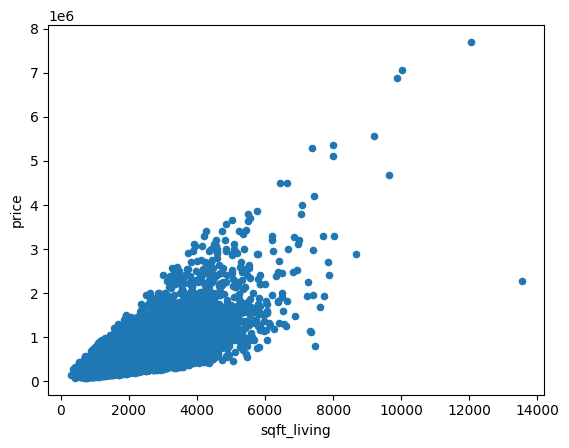

In [9]:
ax = housing.plot.scatter(x='sqft_living', y='price')
plt.show()

In [101]:
features_to_drop = ["price"]
X = housing_final.drop(columns=features_to_drop)
y = housing_final['price']

# One-hot encode 'zipcode' feature
X = pd.get_dummies(X, columns=['zipcode'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
model = XGBRegressor(learning_rate=0.1)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [103]:
predictions = model.predict(X_test)

In [105]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

#r_squared metric
r2 = r2_score(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(rmse)
print(r2)

138695.12285841975
0.8724536164076757
